In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [95]:
df = pd.read_csv("/Users/mrbinit/Downloads/spam.csv")

In [96]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [97]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for empty values
empty_values = (df == '').sum()
print("\nEmpty Values:")
print(empty_values)

Missing Values:
Category    0
Message     0
dtype: int64

Empty Values:
Category    0
Message     0
dtype: int64


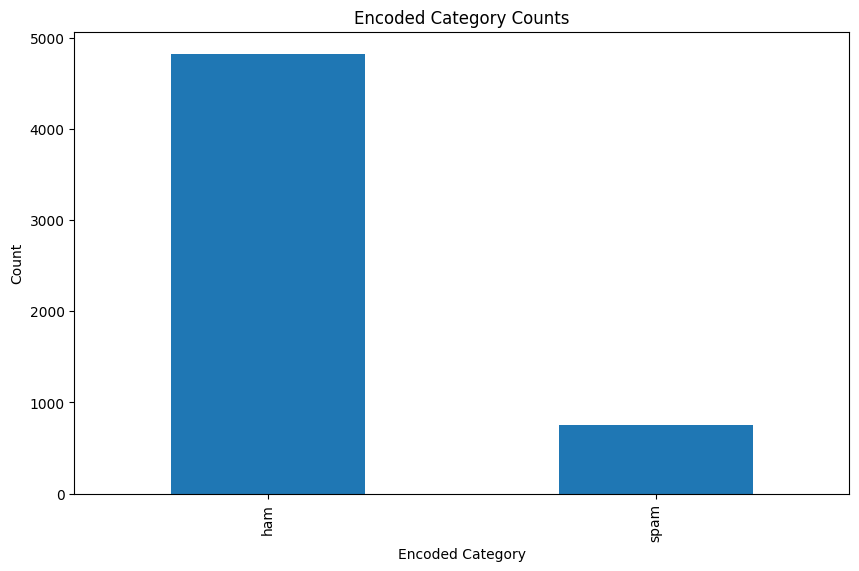

In [98]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Encoded_Category' and count the occurrences
category_counts = df['Category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Encoded Category Counts')
plt.xlabel('Encoded Category')
plt.ylabel('Count')
plt.show()


In [99]:
Label_encoder = LabelEncoder()
encoded_data = Label_encoder.fit_transform(df['Category'])
# Print the encoded data
print(encoded_data)

[0 0 1 ... 0 0 0]


In [100]:
# Replace the original 'Category' column with the encoded labels
df['Encoded_Category'] = encoded_data
df = df.drop('Category', axis = 1)

# Print the DataFrame with the encoded labels
print(df)

                                                Message  Encoded_Category
0     Go until jurong point, crazy.. Available only ...                 0
1                         Ok lar... Joking wif u oni...                 0
2     Free entry in 2 a wkly comp to win FA Cup fina...                 1
3     U dun say so early hor... U c already then say...                 0
4     Nah I don't think he goes to usf, he lives aro...                 0
...                                                 ...               ...
5567  This is the 2nd time we have tried 2 contact u...                 1
5568               Will ü b going to esplanade fr home?                 0
5569  Pity, * was in mood for that. So...any other s...                 0
5570  The guy did some bitching but I acted like i'd...                 0
5571                         Rofl. Its true to its name                 0

[5572 rows x 2 columns]


In [101]:
df.shape

(5572, 2)

In [102]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer

# # Define the category pipeline
# category_pipeline = make_pipeline(
#     SimpleImputer(strategy='most_frequent'),
#     LabelEncoder()
# )

# # Define the message pipeline
# message_pipeline = make_pipeline(
#     SimpleImputer(strategy='most_frequent'),
#     TfidfVectorizer()
# )

# # Define the preprocessing pipeline using ColumnTransformer
# preprocessing = ColumnTransformer([
#     ("category", category_pipeline, ["Category"]),
#     ("message", message_pipeline, ["Message"])  # Corrected: ["Message"] instead of "Message"
# ])

# # Fit-transform the data
# prepared = preprocessing.fit_transform(df)


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['Message'])

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, df['Encoded_Category'], test_size=0.2, random_state=42)



In [104]:
from xgboost import XGBClassifier

# Define the model (XGBoost Classifier) with specified hyperparameters
model_xgb = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=150)

# Train the model
model_xgb.fit(X_train_tfidf, y_train_tfidf)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test_tfidf)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_tfidf, y_pred_xgb)
print("Accuracy with TF-IDF Vectorizer (XGBoost):", accuracy_xgb)



Accuracy with TF-IDF Vectorizer (XGBoost): 0.9838565022421525


In [105]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and other metrics
classification_metrics = classification_report(y_test_tfidf, y_pred_xgb)
print("Classification Report:")
print(classification_metrics)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.90      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [106]:
import pickle

# Save the trained model to a file
with open("model_xgb.pkl", "wb") as f:
    pickle.dump(model_xgb, f)

In [107]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# # Define the model (XGBoost Classifier)
# model_xgb = XGBClassifier()

# # Define the parameter grid for grid search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train_tfidf, y_train_tfidf)

# # Get the best parameters and best score from grid search
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Train the model with the best parameters
# best_model_xgb = XGBClassifier(**best_params)
# best_model_xgb.fit(X_train_tfidf, y_train_tfidf)

# # Make predictions with the best model
# y_pred_best_xgb = best_model_xgb.predict(X_test_tfidf)

# # Calculate accuracy with the best model
# accuracy_best_xgb = accuracy_score(y_test_tfidf, y_pred_best_xgb)
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)
# print("Accuracy with TF-IDF Vectorizer (Best XGBoost Model):", accuracy_best_xgb)


I had used multiple model like LogisticRegression, ADA BOOSTING, RANDOM FOREST, XGB BOOSTING, SVM. IN WHICH XGB BOOSTING HAD HIGHER ACCURACY

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best Score: 0.9777877473705199
Accuracy with TF-IDF Vectorizer (Best XGBoost Model): 0.9838565022421525